#### Import Libraries and Load Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99.0,30,161,2024-09-07,0.84,2,177,1,str-opli-19-002622
1,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,66.0,2,210,2025-02-02,1.18,10,317,16,Exempt
2,9596,"the down home , spacious, central and fab!",14942,Joyce,Other neighborhoods,Wallingford,47.65608,-122.33602,Entire home/apt,NaN,30,96,2020-09-28,0.57,2,0,0,STR -OPLI-19-002622
3,25002,Beautiful Private Spot in North Ballard,102684,Amanda,Ballard,Whittier Heights,47.67947,-122.37196,Entire home/apt,86.0,2,1101,2025-02-28,6.07,1,104,59,STR-OPLI-19-002617
4,119103,Teeny Tiny Guestyhouse!,601600,Hal,Other neighborhoods,Fremont,47.65244,-122.35108,Entire home/apt,83.0,3,574,2025-02-17,3.43,2,345,29,STR-OPLI-19-000772


#### Cleaning 

In [3]:
# Drop Unnecessary Columns

df.drop(columns=['license', 'host_id', 'host_name', 'last_review'], inplace=True)
df.columns

Index(['id', 'name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [4]:
# Convert price Column to Numeric

df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
df['price'].head()

0    99.0
1    66.0
2     NaN
3    86.0
4    83.0
Name: price, dtype: float64

In [5]:
# Check missing values in each column

df.isnull().sum()

id                                  0
name                                0
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                             764
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                 930
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
dtype: int64

In [6]:
#  Remove rows with missing price
df.dropna(subset=['price'], inplace=True)

# Fill missing reviews_per_month with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [7]:
# Confirm all cleaned
df.isnull().sum()

id                                0
name                              0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [8]:
# Get summary of all numerical columns
df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.008000e+03,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000
mean,5.823647e+17,47.625182,-122.334291,155.064081,11.308921,82.376997,1.895003,26.768309,199.839381,19.056758
std,5.175440e+17,0.048700,0.033511,132.487426,18.876327,124.759242,2.184040,70.737299,112.653470,25.936861
min,6.606000e+03,47.501550,-122.419478,22.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.831316e+07,47.600613,-122.357316,89.000000,1.000000,4.000000,0.270000,1.000000,94.000000,1.000000
50%,7.032494e+17,47.622580,-122.331370,123.000000,2.000000,33.000000,1.420000,2.000000,196.000000,11.000000
75%,1.060150e+18,47.662802,-122.311153,178.000000,30.000000,107.000000,2.970000,12.000000,305.000000,30.000000
max,1.377527e+18,47.734010,-122.240870,3000.000000,365.000000,1510.000000,73.020000,333.000000,365.000000,847.000000


## EDA (Exploratory Data Analysis)

#### Count of Listings by Room Type

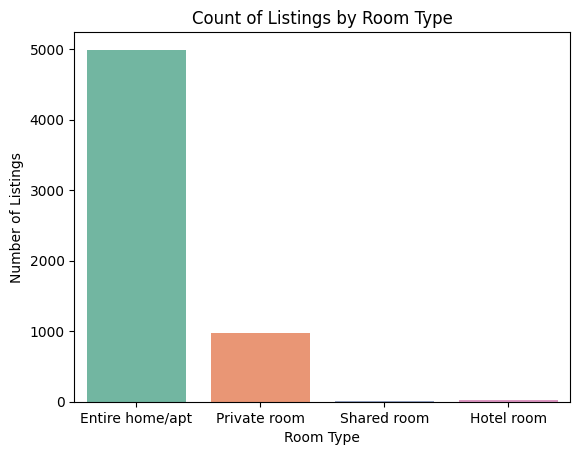

In [28]:
# Shows the most common room types offered in Seattle 

sns.countplot(data=df, x='room_type', hue='room_type', palette='Set2', legend=False)
plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

#### Average Price by Room Type

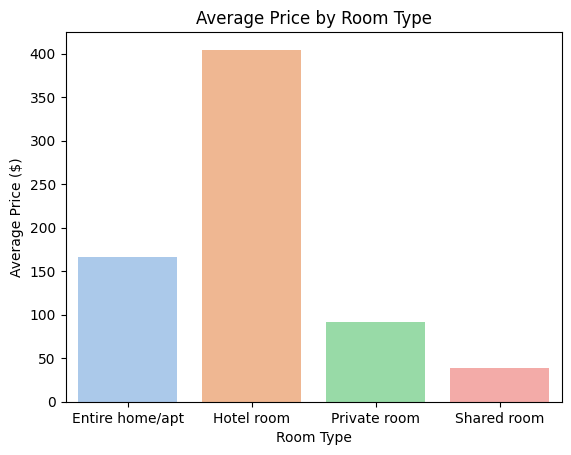

In [29]:
# Compares how pricing differs across various room types like shared or private rooms.

avg_price = df.groupby('room_type')['price'].mean().reset_index()
sns.barplot(data=avg_price, x='room_type', y='price', hue='room_type', palette='pastel', legend=False)
plt.title('Average Price by Room Type')
plt.ylabel('Average Price ($)')
plt.xlabel('Room Type')
plt.show()

#### Top 10 Neighborhoods by Number of Listings

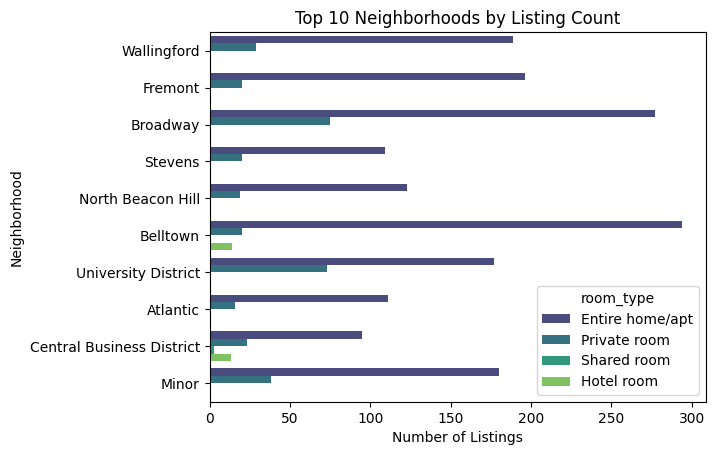

In [30]:
# Shows which neighborhoods have the most Airbnb listings — identifies high-demand areas.

top_neigh = df['neighbourhood'].value_counts().head(10).index

sns.countplot(data=df[df['neighbourhood'].isin(top_neigh)], y='neighbourhood', hue='room_type', palette='viridis')
plt.title('Top 10 Neighborhoods by Listing Count')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()

#### Average Price by Neighborhood (Top 10)

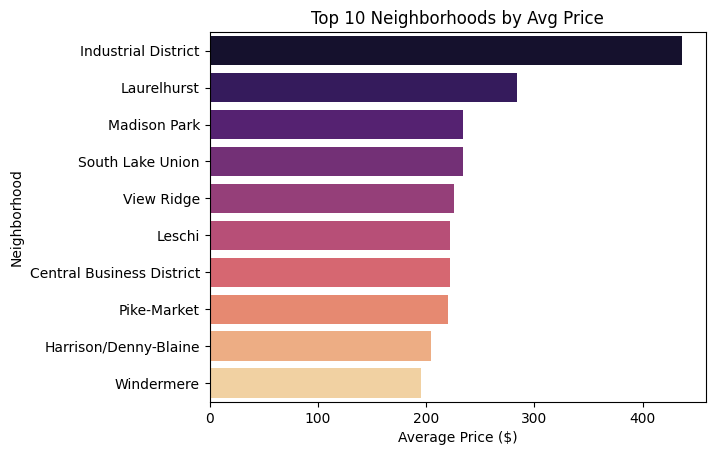

In [22]:
# Highlights the most expensive neighborhoods based on average Airbnb prices.

top10 = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=top10.values, y=top10.index, hue=top10.index, palette='magma', legend=False)
plt.title('Top 10 Neighborhoods by Avg Price')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighborhood')
plt.show()

#### Price Distribution

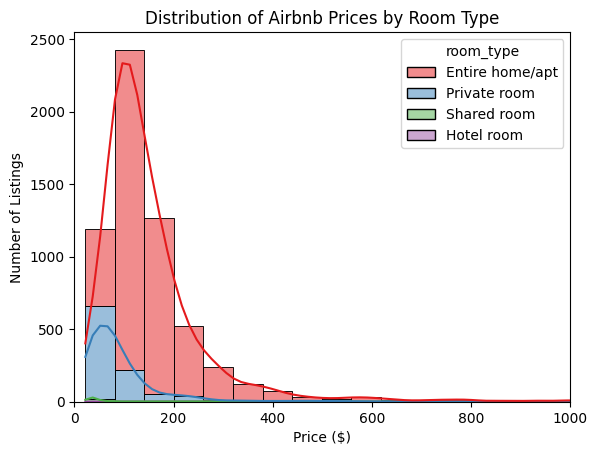

In [23]:
# Displays how listing prices are spread — helps identify price range and outliers.

sns.histplot(data=df, x='price', hue='room_type', bins=50, kde=True, multiple='stack', palette='Set1')
plt.title('Distribution of Airbnb Prices by Room Type')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.xlim(0, 1000)
plt.show()

#### Availability vs Price 

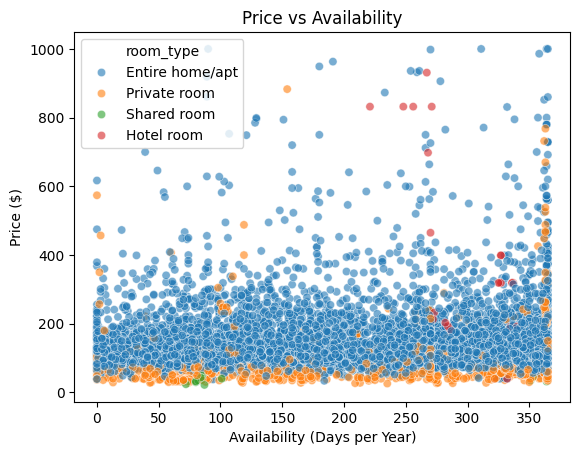

In [31]:
# Shows whether listings available for more days are priced higher or lower.

sns.scatterplot(data=df[df['price'] <= 1000], x='availability_365', y='price', hue='room_type', alpha=0.6)
plt.title('Price vs Availability')
plt.xlabel('Availability (Days per Year)')
plt.ylabel('Price ($)')
plt.show()

#### Correlation Heatmap

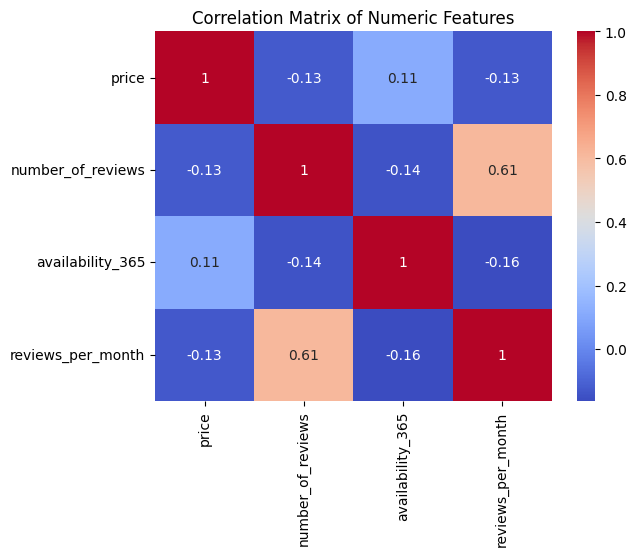

In [27]:
# Highlights which numeric features are related to price, like reviews or availability.

sns.heatmap(df[['price', 'number_of_reviews', 'availability_365', 'reviews_per_month']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()